# Ejemplo de clasificación con sklearn

En este notebook vamos a hacer la clasificación de los círculos de estímulos que hicimos con la logística pero usando sklearn.

In [4]:
import numpy as np
import matplotlib 
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
import time
from matplotlib.colors        import ListedColormap
from sklearn.datasets         import make_circles, load_boston, load_iris
from sklearn.preprocessing    import minmax_scale, StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import GridSearchCV
from sklearn.neural_network   import MLPClassifier
from sklearn.metrics          import classification_report
from numpy                    import cov, array, dot, argsort, zeros, ones, log, exp, vstack, hstack, argmin, argsort, arange, tan, arctan
from numpy.linalg             import norm, eigh

def grafica(Xtr,ytr,Xts,yts,Yp,clf, h=0.02):
    """
    Función auxiliar para mostrar las regiones en el plano
    asignadas a cierta clase con colores distintos
    Tomada de ejemplos de matplotlib y sklearn.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1,2,1)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(Xts[:, 0], Xts[:, 1], c=yts, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax = plt.subplot(1,2,2)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, cmap=cm_bright,
                   edgecolors='k')
    ax.scatter(Xts[:, 0], Xts[:, 1], c=yts, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

def pca(datos, dimens=2):
    """
    Implementación de análisis de componentes principales
    """
    m, n = datos.shape
    D = datos[:]; D -= datos.mean(axis=0)
    R = cov(D, rowvar=False)
    evals, evecs = eigh(R)
    idx = argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dimens]
    return dot(evecs.T, D.T).T, evals, evecs

Generamos nuestros estímulos que ya conocíamos

<IPython.core.display.Javascript object>


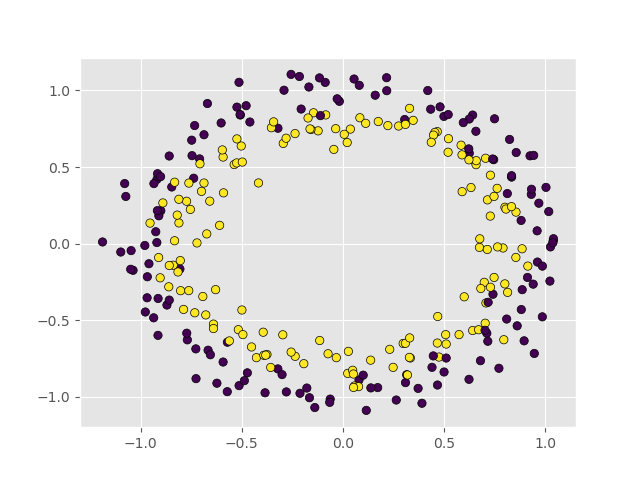

In [5]:
X, y = make_circles(300,noise=0.08)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k')

Usando train_test_split dividimos nuestro conjunto de datos en conjunto de entrenamiento y prueba.

In [11]:
Xtr, Xts, ytr, yts = train_test_split(X,y)

Instanciamos MPLClassifier sin ningún valor y un diccionario con los parámetros que nos interesa explorar. También declaramos a gs que es una instancia de GridSearchCV, que es un objeto que va a buscar dentro de todas las tuplas que se puedan generar a partir de las combinaciones de los parámetros declarados en el diccionario. 

Una vez declarado, usamos el método fit para hacer la búsqueda

#### Nota:
El método **fit** es usado por todos los métodos en los objetos de sklearn para llevar a cabo el entrenamiento

In [4]:
clf = MLPClassifier()
params = {'activation':['tanh','relu'], 
          'hidden_layer_sizes':[(50,20),(50,),(100,50)], 
          'learning_rate_init':[0.01], 
          'max_iter':[100, 200, 300],
          'solver':['lbfgs','adam']}
gs = GridSearchCV(clf,params)
gs.fit(Xtr,ytr)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimiza

KeyboardInterrupt: 

Una vez que haya terminado le pedimos al objeto gs que nos muestre los mejores parámetros encontrados.

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

Entonces lo podemos usar en nuestro clasificador

In [12]:
clf = MLPClassifier(activation='relu', max_iter=200, learning_rate_init=0.01,
                    hidden_layer_sizes=(50,20), solver='adam')
clf.fit(Xtr,ytr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
print("El score asociado es ",clf.score(Xts,yts))
yp = clf.predict(Xts)
print(classification_report(yp,yts))


El score asociado es  0.84
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.87      0.77      0.82        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



Sobre las medidas arrojadas por classification_report puedes leerlas [aquí](https://en.wikipedia.org/wiki/Precision_and_recall)

Ahora observemos las gráficas de los estímulos y la asociada al clasificador ya entrenado

In [14]:
grafica(Xtr,ytr,Xts,yts,yp,clf)